# Наискорейший спуск на сфере
## Постановка задачи
$$\underset{\| x \|^2 - 1 = 0}{min} f(x) = x^T A x$$


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## В следующей ячейке в первой строке задается матрица квадратичной формы.
### Далее заранее обсчитываются квадрат и куб этой матрицы, задается начальное приближение, потом сразу же проецируется на сферу.

In [2]:
A = np.array([[1., 1., -1.], [1., 100., 0], [-1.,0,1.]])

In [3]:
print A


[[   1.    1.   -1.]
 [   1.  100.    0.]
 [  -1.    0.    1.]]


## В следующей ячейке задается функция, которая возвращает значение второй производной целевой функции при выборе шага (см pdf)
$$F'' = \frac{\gamma^3 (-2a_2\widehat{a_2} )+ \gamma^2 (-3a_2\widehat{a_1}) + \gamma(2\widehat{a_2}a_0 - 4a_2\widehat{a_0} + 2a_1\widehat{a_1}) + \widehat{a_1}a_0 + 4a_1\widehat{a_0}}{(\gamma^2 a_2 - 2\gamma a_1 + a_0)^3},$$


$$a_i = {x^k}^T A^i x^k, i = 0,1,2,3$$


In [4]:
def F2(gamma, a2, a2t, a1t, a0, a0t, a1):
    return (gamma**3 * (-2.*a2*a2t) + gamma**2 * (-3. * a2 * a1t) + gamma * (2.*a2t * a0 - 4. * a2 * a0t + 2. * a1 * a1t) + a1t * a0 + 4. * a1 * a0t) / (a2 * gamma**2 - 2. * gamma * a1 + a0)**3

# Далее идет сам метод
Шаги вычисляются в соответствии с написанным в статье, с подстраховской на тот случай, если коэффициент при $\gamma^2$ обратится в ноль (помечено "!")

In [25]:
def method(A, x0, print_rate):
    x = x0 / np.linalg.norm(x0)
    A_sq = A.dot(A)
    A_th = A.dot(A_sq)
    notenough = True
    prevx = x
    i = 0
    while(notenough):
        a0 = x.T.dot(x)
        a1 = x.T.dot(np.dot(A,x))
        a2 = x.T.dot(np.dot(A_sq,x))
        a3 = x.T.dot(np.dot(A_th,x))
        a2t = a2**2 - a3 * a1
        a1t = a3 * a0 - a2 * a1
        a0t = a1**2 - a0 * a2
        """
        print a0
        print a1
        print a2
        print a3
        print '_____'
        print a2t
        print a1t
        print a0t
        """
        if (a2**2 - a3 * a1) != 0:
            if i % print_rate == 0:
                print 'case quadr'
            gamma1 = ((a2 * a1 - a3 * a0) + np.sqrt((a2 * a1 - a3 * a0)**2 - (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma2 = ((a2 * a1 - a3 * a0) - np.sqrt((a2 * a1 - a3 * a0)**2 - (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma_list = []
            for gamma in [gamma1, gamma2]:
                if gamma >=0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    gamma_list.append(gamma)
            #print 'gamma_list len = ', len(gamma_list)
            if len(gamma_list) > 0:
                final_gamma = gamma_list[np.random.randint(len(gamma_list))]
            else:
                if i % print_rate == 0:
                    print 'there is no suitable gamma. shaking point'
                x = np.random.randn(A.shape[0])
                x = x / np.linalg.norm(x)
                continue
            if i % print_rate == 0:
                print 'quadr gamma = ', final_gamma 
            x = (x - final_gamma * np.dot(A, x))/ np.linalg.norm(x - final_gamma * np.dot(A, x))
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        if  (a2**2 - a3 * a1) == 0 and (a3 * a0 - a2 * a1) != 0:
            if i % print_rate == 0:
                print 'case linear'
            gamma = (a1**2 - a0 * a2)/(a3 * a0 - a2 * a1)
            if gamma > 0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    x = (x - gamma * np.dot(A, x))/ np.linalg.norm(x - gamma * np.dot(A, x))
            else:
                if i % print_rate == 0:
                    print 'you got no suitable gamma. shaking point'
                x = np.random.randn(A.shape[0])
                x = x / np.linalg.norm(x)
                continue
        if (a3 * a0 - a2 * a1) == 0 and (a2**2 - a3 * a1) == 0:
            if i % print_rate == 0:
                print 'you got rekt'
                print 'iternum = ', i
                print '(a3 * a0 - a2 * a1)', (a3 * a0 - a2 * a1)
                print '(a2**2 - a3 * a1)', (a2**2 - a3 * a1)
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
        if i % print_rate == 0:
            print 'iter_num = ', i
            print x
        if (np.linalg.norm(x - prevx) < 1e-6):
            notenough = False
        else:
            prevx = x
        xs.append(x)
        fs.append(x.dot(np.dot(A,x)))
        i += 1
    return x

# Начальная точка (1, 0, 1)

In [26]:
x0 = np.array([1., 0., 1.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
quadr gamma =  0.00249996875078
iter_num =  0
[ 0.70710568 -0.00176774  0.70710568]
case quadr
quadr gamma =  0.0361240783536
iter_num =  20
[ 0.70750225 -0.00704957  0.70667593]
case quadr
quadr gamma =  0.00781413789622
iter_num =  40
[ 0.70846229 -0.00708255  0.70571313]
case quadr
quadr gamma =  0.00633383907512
iter_num =  60
[ 0.7087422  -0.00708611  0.70543198]


In [27]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224273369
x* =  [ 0.70881806 -0.00708741  0.70535575]
norm check:  1.0


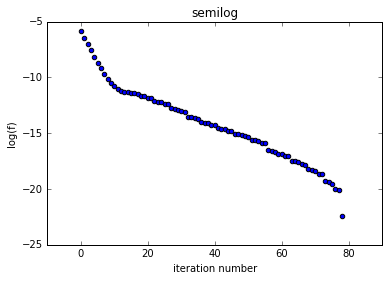

In [28]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (0, 1, 0)

In [29]:
x0 = np.array([0., 1., 0.])
xs = []
fs = []
x = method(A, x0, 1)

case quadr
there is no suitable gamma. shaking point
case quadr
quadr gamma =  0.00248613808752
iter_num =  0
[ 0.9092827  -0.404936    0.09608225]
case quadr
quadr gamma =  0.00248677640698
iter_num =  1
[ 0.94258197 -0.31807824  0.1018109 ]
case quadr
quadr gamma =  0.0024878335711
iter_num =  2
[ 0.96318902 -0.24690646  0.10632083]
case quadr
quadr gamma =  0.0024896292076
iter_num =  3
[ 0.97549664 -0.19053443  0.11001339]
case quadr
quadr gamma =  0.00249272815913
iter_num =  4
[ 0.98266953 -0.14679386  0.11319083]
case quadr
quadr gamma =  0.002498131582
iter_num =  5
[ 0.98676448 -0.11325486  0.11605686]
case quadr
quadr gamma =  0.00250762327265
iter_num =  6
[ 0.98904452 -0.08769984  0.11874204]
case quadr
quadr gamma =  0.00252441073455
iter_num =  7
[ 0.99026115 -0.06827766  0.12133016]
case quadr
quadr gamma =  0.00255435459617
iter_num =  8
[ 0.9908535  -0.05350903  0.12387947]
case quadr
quadr gamma =  0.00260846583894
iter_num =  9
[ 0.99107472 -0.04223585  0.12643987]
c

In [30]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501223963712
x* =  [ 0.70890015 -0.00708814  0.70527323]
norm check:  1.0


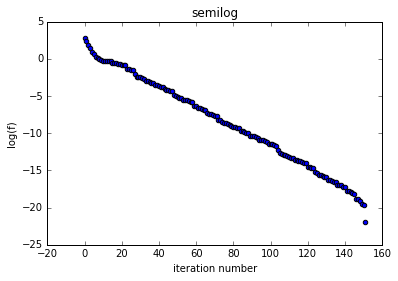

In [31]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(np.hstack((fminfstar[:np.argmin(fs)], fminfstar[np.argmin(fs) + 1:])))

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (-1, 1, 3)

In [32]:
x0 = np.array([-1., 1., 3.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
quadr gamma =  0.00247177816264
iter_num =  0
[-0.30636981  0.23312799  0.92292409]
case quadr
quadr gamma =  0.00253940177566
iter_num =  20
[-0.19927049  0.04452322  0.97893256]
case quadr
quadr gamma =  0.00250673898915
iter_num =  40
[-0.72152578  0.01238341 -0.69227683]
case quadr
quadr gamma =  0.00553382224897
iter_num =  60
[-0.71431783  0.00708163 -0.69978561]
case quadr
quadr gamma =  0.0625516809767
iter_num =  80
[-0.70982991  0.00712217 -0.70433711]
case quadr
quadr gamma =  0.125384337216
iter_num =  100
[-0.70911817  0.00709027 -0.70505401]
case quadr
quadr gamma =  0.0160442196295
iter_num =  120
[-0.70892189  0.0070884  -0.70525138]


In [33]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224083861
x* =  [-0.70889679  0.00708897 -0.7052766 ]
norm check:  1.0


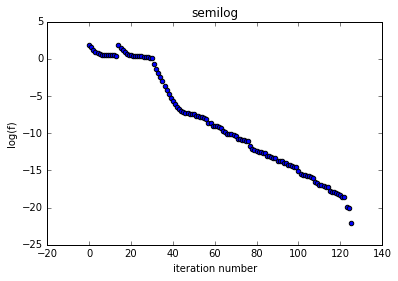

In [34]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (-1, -30, 3)

In [35]:
x0 = np.array([-1., -30., 3.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
there is no suitable gamma. shaking point
case quadr
quadr gamma =  0.00246272249405
iter_num =  0
[ 0.69764017  0.15080108 -0.70039791]
case quadr
quadr gamma =  0.00246328646795
iter_num =  20
[ 0.7048545  -0.00657462 -0.70932145]
case quadr
quadr gamma =  0.00569074568494
iter_num =  40
[-0.94883236  0.01255932 -0.31553036]
case quadr
quadr gamma =  0.0928859678425
iter_num =  60
[-0.79359155  0.005759   -0.6084236 ]
case quadr
quadr gamma =  0.0364249654098
iter_num =  80
[-0.74094165  0.00802242 -0.67152149]
case quadr
quadr gamma =  0.0170111643756
iter_num =  100
[-0.71671426  0.00723118 -0.69732946]
case quadr
quadr gamma =  0.00773216608735
iter_num =  120
[-0.71103668  0.00712001 -0.70311887]
case quadr
quadr gamma =  0.0453127215201
iter_num =  140
[-0.7094603   0.00710726 -0.70470956]
case quadr
quadr gamma =  0.00829456710812
iter_num =  160
[-0.70898277  0.0070899  -0.70519016]
case quadr
quadr gamma =  0.0169867730615
iter_num =  180
[-0.70889874  0.00708899 -

In [36]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224408385
x* =  [-0.7088859   0.00708835 -0.70528756]
norm check:  1.0


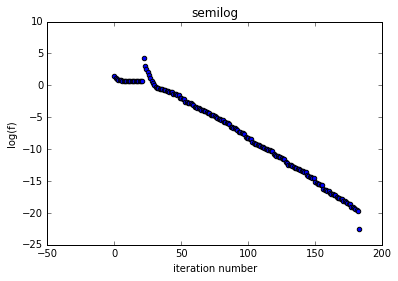

In [37]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (9, -30, 3)

In [38]:
x0 = np.array([9., -30., 3.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
there is no suitable gamma. shaking point
case quadr
quadr gamma =  0.00249886168756
iter_num =  0
[-0.81562032  0.21491278 -0.53719269]
case quadr
quadr gamma =  0.00766398240433
iter_num =  20
[-0.78638093  0.00750935 -0.61769624]
case quadr
quadr gamma =  0.00552666952633
iter_num =  40
[-0.73481869  0.00765457 -0.67822039]
case quadr
quadr gamma =  0.00565019287283
iter_num =  60
[-0.71658357  0.00725145 -0.69746355]
case quadr
quadr gamma =  0.045659691111
iter_num =  80
[-0.71088227  0.00715227 -0.70327465]
case quadr
quadr gamma =  0.0265907750977
iter_num =  100
[-0.70926294  0.00709816 -0.70490829]
case quadr
quadr gamma =  0.0165152550424
iter_num =  120
[-0.7089309   0.00708839 -0.70524232]


In [39]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224606155
x* =  [-0.70887677  0.0070884  -0.70529673]
norm check:  1.0


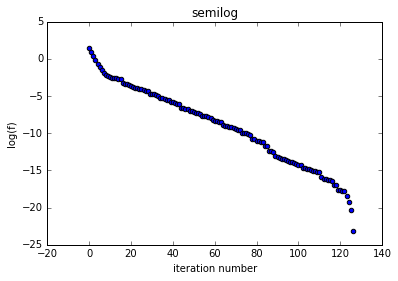

In [40]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

In [23]:
print A.shape[0]
print np.random.randn(3)

3
[ 0.08649314  2.4323584  -1.71065635]
